In [1]:
#importing the necessary libraries.
from collections import namedtuple
from scipy.spatial import ConvexHull, Delaunay
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Function to create random points within the given vertices.

In [ ]:
def generate_fake_data(vertex, sample_num):
    #creating a convex hull from the given vertices to define the region boundary.
    hull = ConvexHull(vertex)
    
    #initializing an empty list to store the generated points.
    field_vertices = []

    #keep generating points until the desired number of samples is obtained.
    while len(field_vertices) < sample_num:
        
        #generating a large number of random points within a bounding box.
        #bounding box is defined by the min and max x, y values of the vertices.
        fake_data = np.random.rand(2, sample_num * 10)  #generating random points.
        fake_data[0] *= (max(vertex[:, 0]) - min(vertex[:, 0]))  #scaling x-coordinates.
        fake_data[1] *= (max(vertex[:, 1]) - min(vertex[:, 1]))  #scaling y-coordinates.
        fake_data[0] += min(vertex[:, 0])  #shifting x-coordinates to match the bounding box.
        fake_data[1] += min(vertex[:, 1])  #shifting y-coordinates to match the bounding box.

        #checking if the generated points lie within respective evrtices.
        check_points = fake_data[:, Delaunay(vertex).find_simplex(fake_data.T) >= 0].T
        
        #rounding the valid points to 2 decimal points.
        check_points = np.round(check_points, decimals=2)
        
        #adding the final points in the list created.
        field_vertices.extend(check_points)

    return np.array(field_vertices[:sample_num])


# Vertices for case a) where points are allowed to be on the borders.

In [30]:
rhyolite_vertices = np.array([[77, 0], [88, 4], [86, 6], [69, 12.5], [69.2,7.7]])
basalt_vertices = np.array([[45, 0], [51.9, 0], [51.9,5], [45, 5]])
andesite_vertices = np.array([[57, 0], [63, 0], [57, 6], [63,7]])
dacite_vertices = np.array([[63, 0], [76.8, 0], [63, 7], [69,8]])
basanite_vertices = np.array([[41.1, 3], [45, 3], [41.1, 5.2], [45,5.2]])
trachyte_vertices = np.array([[58.5, 10.6], [68.8, 10.6], [58.1,12],[60.6,13.4],[68, 15]])
tephrite_vertices = np.array([[41.1, 5.3], [45.1, 5.3], [44.9, 9.3], [49.2,7.3],[41.1,7]])
phonolite_vertices = np.array([[57.5, 11.8], [63.3, 15], [50.9, 15]])
phonotephrite_vertices = np.array([[49.6, 7.5], [44.9, 9.5], [48.6, 11.4], [52.6,9.3]])
trachybasalt_vertices = np.array([[45.3, 5.1], [51.6, 5.1], [49.4, 7.2]])
trachyandesite_vertices = np.array([[57, 6], [63, 7], [53, 9.4], [57.4,11.5]])
basalticandesite_vertices = np.array([[52, 0], [52, 5], [56.8, 0], [56.8,5.9]])
picrobasalt_vertices = np.array([[41.1, 0], [41.1, 3], [44.9, 0], [44.9,3]])
tephriphonolite_vertices = np.array([[53, 9.4], [57.4, 11.7], [52.5, 13.9], [48.7,11.6]])
basaltictrachyandesite_vertices = np.array([[52, 5], [56.8,6], [49.6, 7.4], [52.9,9.2]])
foidite_vertices = np.array([[40.9, 7], [38,7], [38, 14], [52.4,14]])
foidite_vertices2 = np.array([[38, 2.5], [40.9,2.5], [40.9, 7], [38,7]])
trachydacite_vertices = np.array([[62.8, 7.1], [68.8, 8.1], [68.8, 10.5], [59.5,10.5]])


# Vertices for case b) where points are not allowed on the borders.

In [4]:
rhyolite_verticesT = np.array([[77.3, 0], [88, 4], [86, 6], [69.3, 12.5], [69.5,7.7]])
basalt_verticesT = np.array([[45.2, 0.2], [51.8, 0.2], [45.2, 4.9], [51.8,4.9]])
andesite_verticesT = np.array([[57.1, 0.1], [62.8, 0.1], [57.1, 5.9], [62.8,6.9]])
dacite_verticesT = np.array([[63.1, 0.1], [76.5, 0.1], [63.1, 6.9], [69,7.9]])
basanite_verticesT = np.array([[41.3, 3.1], [44.8, 3.1], [41.3, 5.2], [44.8,5.2]])
trachyte_verticesT = np.array([[58.5, 10.6], [68.8, 10.6], [58.1,12],[60.8,13.4],[68, 15]])
trachyte_vertices = np.array([[58.5, 10.6], [68.8, 10.6], [58.1,12],[60.6,13.4],[68, 15]])
tephrite_verticesT = np.array([[41.3, 5.3], [45, 5.3], [44.9, 9.3], [49,7.3],[41.3,7]])
phonolite_verticesT = np.array([[57.5, 11.8], [62.4, 15], [51, 15]])
phonolite_vertices = np.array([[57.5, 11.8], [62.5, 15], [50.9, 15]])
phonotephrite_verticesT = np.array([[49.6, 7.6], [44.9, 9.4], [48.6, 11.4], [52.6,9.3]])
trachybasalt_verticesT = np.array([[45.4, 5.1], [51.6, 5.1], [49.4, 7.2]])
trachyandesite_verticesT = np.array([[56.9, 6.1], [62.9, 7.2], [53.1, 9.4], [57.4,11.5]])
basalticandesite_verticesT = np.array([[52.3, 0.1], [52.3, 4.9], [56.7, 0.1], [56.7,5.7]])
picrobasalt_verticesT = np.array([[41.3, 0.1], [41.3, 2.9], [44.7, 0.1], [44.7,2.9]])
tephriphonolite_verticesT = np.array([[53, 9.5], [57.3, 11.7], [52.5, 13.8], [48.,11.6]])
basaltictrachyandesite_verticesT = np.array([[52.1, 5.2], [56.8,6], [49.6, 7.4], [52.8,9.2]])
foidite_verticesT = np.array([[40.5, 7], [38,7], [38, 14], [52.2,14]])
foidite_vertices2T = np.array([[38, 2.5], [40.5,2.5], [40.5, 7], [38,7]])
trachydacite_verticesT = np.array([[63, 7.1], [68.8, 8.1], [68.8, 10.3], [59.7,10.3]])

# Vertices for case c) where points are 10% away from the borders.

In [5]:
rhyolite_verticesM = np.array([[78.1, 0.4], [86.9, 3.6], [85, 5.4], [69.5, 12.3], [69.8,7.7]])
basalt_verticesM = np.array([[45.8, 0.5], [51.1, 0.5], [45.8, 4.5], [51.1,4.5]])
andesite_verticesM = np.array([[57.7, 0.6], [62.4, 0.6], [57.7, 5.4], [62.4,6.3]])
dacite_verticesM = np.array([[64.4, 0.7], [75.1, 0.7], [64.4, 6.3], [67.8,7.1]])
basanite_verticesM = np.array([[41.6, 3.3], [44.5, 3.3], [41.6, 4.8], [44.5,4.8]])
trachyte_verticesM = np.array([[59.5, 10.8], [67.8, 10.8], [58.9,12],[61.6,13.4],[67.1, 14.7]])
trachyte_vertices = np.array([[58.5, 10.6], [68.8, 10.6], [58.1,12],[60.6,13.4],[68, 15]])
tephrite_verticesM = np.array([[41.6, 5.6], [44.9, 5.6], [44.9, 8.9], [48.2,7.3],[41.7,6.8]])
phonolite_verticesM = np.array([[57.5, 12.2], [62, 14.8], [51.2, 14.8]])
phonolite_vertices = np.array([[57.5, 11.8], [62.5, 15], [50.9, 15]])
phonotephrite_verticesM = np.array([[49.6, 7.8], [45.8, 9.5], [48.6, 11.1], [51.9,9.2]])
trachybasalt_verticesM = np.array([[46, 5.3], [51, 5.3], [49.2, 7]])
trachyandesite_verticesM = np.array([[57.6, 6.5], [61.9, 7.3], [53.8, 9.1], [57.4,11.2]])
basalticandesite_verticesM = np.array([[52.6, 0.5], [52.6, 4.5], [56.4, 0.5], [56.4,5.4]])
picrobasalt_verticesM = np.array([[41.5, 0.3], [41.4, 2.7], [44.6, 0.3], [44.6,2.7]])
tephriphonolite_verticesM = np.array([[53, 9.8], [56.7, 11.8], [52.5, 13.5], [49.4,11.6]])
basaltictrachyandesite_verticesM = np.array([[52.5, 5.5], [56,6], [50.1, 7.4], [52.7,8.7]])
foidite_verticesM = np.array([[40.1, 7], [38,7], [38, 14], [51.8,14]])
foidite_vertices2M = np.array([[38, 2.5], [40.1,2.5], [40.1, 7], [38,7]])
trachydacite_verticesM = np.array([[63.4, 7.4], [68, 8.4], [68, 10.2], [60.4,10.2]])

# Creating 2500 number of smaples for smaller fields and gradually moving to 5500 for larger fields, for all the 3 cases.

In [6]:
rhyolite_fake_data = generate_fake_data(rhyolite_vertices, sample_num=5500)
basalt_fake_data = generate_fake_data(basalt_vertices, sample_num=2500)
andesite_fake_data = generate_fake_data(andesite_vertices, sample_num=3500)
dacite_fake_data = generate_fake_data(dacite_vertices, sample_num=5000)
basanite_fake_data = generate_fake_data(basanite_vertices, sample_num=2500)
trachyte_fake_data = generate_fake_data(trachyte_vertices, sample_num=4000)
tephrite_fake_data = generate_fake_data(tephrite_vertices, sample_num=3000)
phonolite_fake_data = generate_fake_data(phonolite_vertices, sample_num=2500)
phonotephrite_fake_data = generate_fake_data(phonotephrite_vertices, sample_num=3500)
trachybasalt_fake_data = generate_fake_data(trachybasalt_vertices, sample_num=2500)
trachyandesite_fake_data = generate_fake_data(trachyandesite_vertices, sample_num=2500)
basalticandesite_fake_data = generate_fake_data(basalticandesite_vertices, sample_num=3000)
picrobasalt_fake_data = generate_fake_data(picrobasalt_vertices, sample_num=2500)
tephriphonolite_fake_data = generate_fake_data(tephriphonolite_vertices, sample_num=3500)
basaltictrachyandesite_fake_data = generate_fake_data(basaltictrachyandesite_vertices, sample_num=3000)
foidite_fake_data = generate_fake_data(foidite_vertices, sample_num=4500)
foidite_fake_data2 = generate_fake_data(foidite_vertices2, sample_num=3500)
trachydacite_fake_data = generate_fake_data(trachydacite_vertices, sample_num=4000)

In [7]:
rhyolite_fake_dataT = generate_fake_data(rhyolite_verticesT, sample_num=5500)
basalt_fake_dataT = generate_fake_data(basalt_verticesT, sample_num=2500)
andesite_fake_dataT = generate_fake_data(andesite_verticesT, sample_num=3500)
dacite_fake_dataT = generate_fake_data(dacite_verticesT, sample_num=5000)
basanite_fake_dataT = generate_fake_data(basanite_verticesT, sample_num=2500)
trachyte_fake_dataT = generate_fake_data(trachyte_verticesT, sample_num=4000)
tephrite_fake_dataT = generate_fake_data(tephrite_verticesT, sample_num=3000)
phonolite_fake_dataT = generate_fake_data(phonolite_verticesT, sample_num=2500)
phonotephrite_fake_dataT = generate_fake_data(phonotephrite_verticesT, sample_num=3500)
trachybasalt_fake_dataT = generate_fake_data(trachybasalt_verticesT, sample_num=2500)
trachyandesite_fake_dataT = generate_fake_data(trachyandesite_verticesT, sample_num=2500)
basalticandesite_fake_dataT = generate_fake_data(basalticandesite_verticesT, sample_num=3000)
picrobasalt_fake_dataT = generate_fake_data(picrobasalt_verticesT, sample_num=2500)
tephriphonolite_fake_dataT = generate_fake_data(tephriphonolite_verticesT, sample_num=3500)
basaltictrachyandesite_fake_dataT = generate_fake_data(basaltictrachyandesite_verticesT, sample_num=3000)
foidite_fake_dataT = generate_fake_data(foidite_verticesT, sample_num=4500)
foidite_fake_data2T = generate_fake_data(foidite_vertices2T, sample_num=3500)
trachydacite_fake_dataT = generate_fake_data(trachydacite_verticesT, sample_num=4000)

In [8]:
rhyolite_fake_dataM = generate_fake_data(rhyolite_verticesM, sample_num=5500)
basalt_fake_dataM = generate_fake_data(basalt_verticesM, sample_num=2500)
andesite_fake_dataM = generate_fake_data(andesite_verticesM, sample_num=3500)
dacite_fake_dataM = generate_fake_data(dacite_verticesM, sample_num=5000)
basanite_fake_dataM = generate_fake_data(basanite_verticesM, sample_num=2500)
trachyte_fake_dataM = generate_fake_data(trachyte_verticesM, sample_num=4000)
tephrite_fake_dataM = generate_fake_data(tephrite_verticesM, sample_num=3000)
phonolite_fake_dataM = generate_fake_data(phonolite_verticesM, sample_num=2500)
phonotephrite_fake_dataM = generate_fake_data(phonotephrite_verticesM, sample_num=3500)
trachybasalt_fake_dataM = generate_fake_data(trachybasalt_verticesM, sample_num=2500)
trachyandesite_fake_dataM = generate_fake_data(trachyandesite_verticesM, sample_num=2500)
basalticandesite_fake_dataM = generate_fake_data(basalticandesite_verticesM, sample_num=3000)
picrobasalt_fake_dataM = generate_fake_data(picrobasalt_verticesM, sample_num=2500)
tephriphonolite_fake_dataM = generate_fake_data(tephriphonolite_verticesM, sample_num=3500)
basaltictrachyandesite_fake_dataM = generate_fake_data(basaltictrachyandesite_verticesM, sample_num=3000)
foidite_fake_dataM = generate_fake_data(foidite_verticesM, sample_num=4500)
foidite_fake_data2M = generate_fake_data(foidite_vertices2M, sample_num=3500)
trachydacite_fake_dataM = generate_fake_data(trachydacite_verticesM, sample_num=4000)

# Now storing the points generated in respective rock name df, for all the 3 cases

In [9]:
df_rhyolite = pd.DataFrame(rhyolite_fake_data, columns=['SiO2', 'Na2O+K2O'])
df_basalt = pd.DataFrame(basalt_fake_data, columns=['SiO2', 'Na2O+K2O'])
df_andesite = pd.DataFrame(andesite_fake_data, columns=['SiO2', 'Na2O+K2O'])
df_dacite = pd.DataFrame(dacite_fake_data, columns=['SiO2', 'Na2O+K2O'])
df_basanite = pd.DataFrame(basanite_fake_data, columns=['SiO2', 'Na2O+K2O'])
df_trachyte = pd.DataFrame(trachyte_fake_data, columns=['SiO2', 'Na2O+K2O'])
df_tephrite = pd.DataFrame(tephrite_fake_data, columns=['SiO2', 'Na2O+K2O'])
df_phonolite = pd.DataFrame(phonolite_fake_data, columns=['SiO2', 'Na2O+K2O'])
df_phonotephrite = pd.DataFrame(phonotephrite_fake_data, columns=['SiO2', 'Na2O+K2O'])
df_trachybasalt = pd.DataFrame(trachybasalt_fake_data, columns=['SiO2', 'Na2O+K2O'])
df_trachyandesite = pd.DataFrame(trachyandesite_fake_data, columns=['SiO2', 'Na2O+K2O'])
df_basalticandesite = pd.DataFrame(basalticandesite_fake_data, columns=['SiO2', 'Na2O+K2O'])
df_picrobasalt = pd.DataFrame(picrobasalt_fake_data, columns=['SiO2', 'Na2O+K2O'])
df_tephriphonolite = pd.DataFrame(tephriphonolite_fake_data, columns=['SiO2', 'Na2O+K2O'])
df_basaltictrachyandesite = pd.DataFrame(basaltictrachyandesite_fake_data, columns=['SiO2', 'Na2O+K2O'])
df_foidite = pd.DataFrame(foidite_fake_data, columns=['SiO2', 'Na2O+K2O'])
df_foidite2 = pd.DataFrame(foidite_fake_data2, columns=['SiO2', 'Na2O+K2O'])
df_trachydacite = pd.DataFrame(trachydacite_fake_data, columns=['SiO2', 'Na2O+K2O'])

In [10]:
df_rhyoliteT = pd.DataFrame(rhyolite_fake_dataT, columns=['SiO2', 'Na2O+K2O'])
df_basaltT = pd.DataFrame(basalt_fake_dataT, columns=['SiO2', 'Na2O+K2O'])
df_andesiteT = pd.DataFrame(andesite_fake_dataT, columns=['SiO2', 'Na2O+K2O'])
df_daciteT = pd.DataFrame(dacite_fake_dataT, columns=['SiO2', 'Na2O+K2O'])
df_basaniteT = pd.DataFrame(basanite_fake_dataT, columns=['SiO2', 'Na2O+K2O'])
df_trachyteT = pd.DataFrame(trachyte_fake_dataT, columns=['SiO2', 'Na2O+K2O'])
df_tephriteT = pd.DataFrame(tephrite_fake_dataT, columns=['SiO2', 'Na2O+K2O'])
df_phonoliteT = pd.DataFrame(phonolite_fake_dataT, columns=['SiO2', 'Na2O+K2O'])
df_phonotephriteT = pd.DataFrame(phonotephrite_fake_dataT, columns=['SiO2', 'Na2O+K2O'])
df_trachybasaltT = pd.DataFrame(trachybasalt_fake_dataT, columns=['SiO2', 'Na2O+K2O'])
df_trachyandesiteT = pd.DataFrame(trachyandesite_fake_dataT, columns=['SiO2', 'Na2O+K2O'])
df_basalticandesiteT = pd.DataFrame(basalticandesite_fake_dataT, columns=['SiO2', 'Na2O+K2O'])
df_picrobasaltT = pd.DataFrame(picrobasalt_fake_dataT, columns=['SiO2', 'Na2O+K2O'])
df_tephriphonoliteT = pd.DataFrame(tephriphonolite_fake_dataT, columns=['SiO2', 'Na2O+K2O'])
df_basaltictrachyandesiteT = pd.DataFrame(basaltictrachyandesite_fake_dataT, columns=['SiO2', 'Na2O+K2O'])
df_foiditeT = pd.DataFrame(foidite_fake_dataT, columns=['SiO2', 'Na2O+K2O'])
df_foidite2T = pd.DataFrame(foidite_fake_data2T, columns=['SiO2', 'Na2O+K2O'])
df_trachydaciteT = pd.DataFrame(trachydacite_fake_dataT, columns=['SiO2', 'Na2O+K2O'])

In [11]:
df_rhyoliteM = pd.DataFrame(rhyolite_fake_dataM, columns=['SiO2', 'Na2O+K2O'])
df_basaltM = pd.DataFrame(basalt_fake_dataM, columns=['SiO2', 'Na2O+K2O'])
df_andesiteM = pd.DataFrame(andesite_fake_dataM, columns=['SiO2', 'Na2O+K2O'])
df_daciteM = pd.DataFrame(dacite_fake_dataM, columns=['SiO2', 'Na2O+K2O'])
df_basaniteM = pd.DataFrame(basanite_fake_dataM, columns=['SiO2', 'Na2O+K2O'])
df_trachyteM = pd.DataFrame(trachyte_fake_dataM, columns=['SiO2', 'Na2O+K2O'])
df_tephriteM = pd.DataFrame(tephrite_fake_dataM, columns=['SiO2', 'Na2O+K2O'])
df_phonoliteM = pd.DataFrame(phonolite_fake_dataM, columns=['SiO2', 'Na2O+K2O'])
df_phonotephriteM = pd.DataFrame(phonotephrite_fake_dataM, columns=['SiO2', 'Na2O+K2O'])
df_trachybasaltM = pd.DataFrame(trachybasalt_fake_dataM, columns=['SiO2', 'Na2O+K2O'])
df_trachyandesiteM = pd.DataFrame(trachyandesite_fake_dataM, columns=['SiO2', 'Na2O+K2O'])
df_basalticandesiteM = pd.DataFrame(basalticandesite_fake_dataM, columns=['SiO2', 'Na2O+K2O'])
df_picrobasaltM = pd.DataFrame(picrobasalt_fake_dataM, columns=['SiO2', 'Na2O+K2O'])
df_tephriphonoliteM = pd.DataFrame(tephriphonolite_fake_dataM, columns=['SiO2', 'Na2O+K2O'])
df_basaltictrachyandesiteM = pd.DataFrame(basaltictrachyandesite_fake_dataM, columns=['SiO2', 'Na2O+K2O'])
df_foiditeM = pd.DataFrame(foidite_fake_dataM, columns=['SiO2', 'Na2O+K2O'])
df_foidite2M = pd.DataFrame(foidite_fake_data2M, columns=['SiO2', 'Na2O+K2O'])
df_trachydaciteM = pd.DataFrame(trachydacite_fake_dataM, columns=['SiO2', 'Na2O+K2O'])

# Defining the TAS Plot 

In [35]:
def TAS(ax, plot_names=True, fontsize=8):
    from collections import namedtuple
    FieldLine = namedtuple('FieldLine', 'x1 y1 x2 y2')
    lines = (FieldLine(x1=41, y1=0, x2=41, y2=7),
             FieldLine(x1=41, y1=7, x2=52.5, y2=14),
             FieldLine(x1=45, y1=0, x2=45, y2=5),
             FieldLine(x1=41, y1=3, x2=45, y2=3),
             FieldLine(x1=45, y1=5, x2=61, y2=13.5),
             FieldLine(x1=45, y1=5, x2=52, y2=5),
             FieldLine(x1=52, y1=5, x2=69, y2=8),
             FieldLine(x1=49.4, y1=7.3, x2=52, y2=5),
             FieldLine(x1=52, y1=5, x2=52, y2=0),
             FieldLine(x1=48.4, y1=11.5, x2=53, y2=9.3),
             FieldLine(x1=53, y1=9.3, x2=57, y2=5.9),
             FieldLine(x1=57, y1=5.9, x2=57, y2=0),
             FieldLine(x1=52.5, y1=14, x2=57.6, y2=11.7),
             FieldLine(x1=57.6, y1=11.7, x2=63, y2=7),
             FieldLine(x1=63, y1=7, x2=63, y2=0),
             FieldLine(x1=69, y1=12, x2=69, y2=8),
             FieldLine(x1=45, y1=9.4, x2=49.4, y2=7.3),
             FieldLine(x1=69, y1=8, x2=77, y2=0)
            )

    FieldName = namedtuple('FieldName', 'name x y rotation')
    names = (FieldName('Picro\nbasalt', 43, 2, 0),
             FieldName('Basalt', 48.5, 2, 0),
             FieldName('Basaltic\nandesite', 54.5, 3.9, 0),
             FieldName('Andesite', 60, 2, 0),
             FieldName('Dacite', 68.5, 2, 0),
             FieldName('Rhyolite', 75.5, 6.5, 0),
             FieldName('Trachyte',
                       64.5, 12.5, 0),
             FieldName('Trachy\ndacite',
                       64.7, 9.5, 0),
             FieldName('2', 52.6, 7.3, 0),
             FieldName('1', 48.7, 6.2, 0),
             FieldName('3', 57.2, 8.8, 0),
             FieldName('Phono\ntephrite', 49, 9.9, 0),
             FieldName('Tephri\nphonolite', 53.0, 12.1, 0),
             FieldName('Phonolite', 57.5, 14.5, 0),
             FieldName('Tephrite', 45, 7.3, 0),
             FieldName('Foidite', 44, 11.5, 0),
             FieldName('Basa\nnite', 43, 4.5, 0))

#Plotting the lines and fields.
    for line in lines:
        ax.plot([line.x1, line.x2], [line.y1, line.y2],
                       '-', color='black', zorder=2)
#Plotting the names if plot_names is True.
    if plot_names:
        for name in names:
            ax.text(name.x, name.y, name.name, color='black', size=11,
                    horizontalalignment='center', verticalalignment='top',
                    rotation=name.rotation, zorder=2,
                    bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', boxstyle='round,pad=0.2'))


# Plotting all the three cases together.

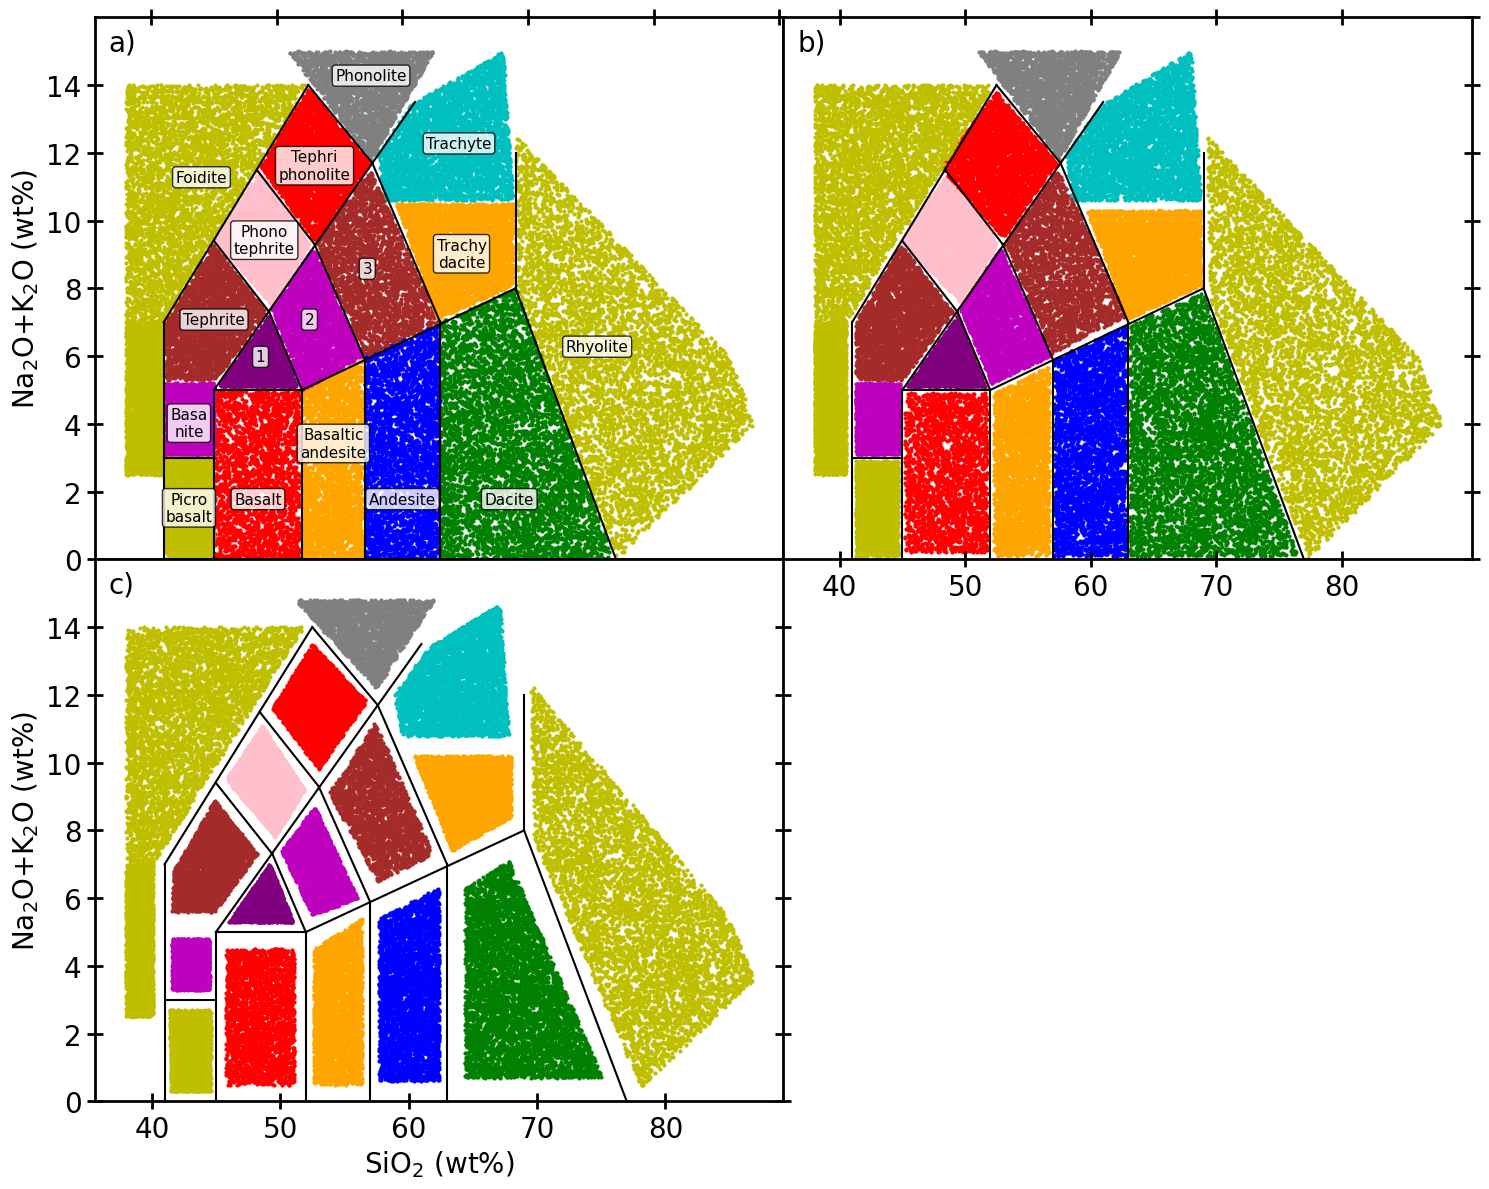

In [36]:
fig = plt.figure(figsize=(15, 12))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1], wspace=0, hspace=0)
plt.rcParams['axes.linewidth'] = 2  
plt.rcParams['xtick.major.width'] = 2  
plt.rcParams['ytick.major.width'] = 2  
axs = [fig.add_subplot(gs[i, j]) for i in range(2) for j in range(2)]

TAS(axs[0])  #TAS plot on the first case.
axs[0].plot(df_rhyolite['SiO2'], df_rhyolite['Na2O+K2O'], 'o',c='y',zorder=1, markersize=2)
axs[0].plot(df_basalt['SiO2'], df_basalt['Na2O+K2O'], 'o',c='r',zorder=1,markersize=2)
axs[0].plot(df_andesite['SiO2'], df_andesite['Na2O+K2O'], 'o',c='b',zorder=1, markersize=2)
axs[0].plot(df_dacite['SiO2'], df_dacite['Na2O+K2O'], 'o',c='g',zorder=1, markersize=2)
axs[0].plot(df_basanite['SiO2'], df_basanite['Na2O+K2O'], 'o',c='m',zorder=1, markersize=2)
axs[0].plot(df_trachyte['SiO2'], df_trachyte['Na2O+K2O'], 'o',c='c',zorder=1, markersize=2)
axs[0].plot(df_tephrite['SiO2'], df_tephrite['Na2O+K2O'], 'o',c='brown',zorder=1, markersize=2)
axs[0].plot(df_phonolite['SiO2'], df_phonolite['Na2O+K2O'], 'o',c='gray',zorder=1,markersize=2)
axs[0].plot(df_phonotephrite['SiO2'], df_phonotephrite['Na2O+K2O'], 'o',c='pink',zorder=1, markersize=2)
axs[0].plot(df_trachybasalt['SiO2'], df_trachybasalt['Na2O+K2O'], 'o',c='purple',zorder=1, markersize=2)
axs[0].plot(df_trachyandesite['SiO2'], df_trachyandesite['Na2O+K2O'], 'o',c='brown',zorder=1, markersize=2)
axs[0].plot(df_basalticandesite['SiO2'], df_basalticandesite['Na2O+K2O'], 'o',c='#FFA500',zorder=1, markersize=2)
axs[0].plot(df_picrobasalt['SiO2'], df_picrobasalt['Na2O+K2O'], 'o',c='y',zorder=1, markersize=2)
axs[0].plot(df_tephriphonolite['SiO2'], df_tephriphonolite['Na2O+K2O'], 'o',c='r',zorder=1, markersize=2)
axs[0].plot(df_basaltictrachyandesite['SiO2'], df_basaltictrachyandesite['Na2O+K2O'], 'o',c='m',zorder=1, markersize=2)
axs[0].plot(df_foidite['SiO2'], df_foidite['Na2O+K2O'], 'o',c='y',zorder=1, markersize=2)
axs[0].plot(df_foidite2['SiO2'], df_foidite2['Na2O+K2O'], 'o',c='y',zorder=1, markersize=2)
axs[0].plot(df_trachydacite['SiO2'], df_trachydacite['Na2O+K2O'], 'o',c='#FFA500',zorder=1, markersize=2)
axs[0].set_ylim(0, 16)
# axs[0].set_xlabel(r'SiO$_2$ (wt%)')
axs[0].set_ylabel(r'Na$_2$O+K$_2$O (wt%)',fontsize=20)
axs[0].grid(False)
axs[0].set_facecolor('white')
axs[0].tick_params(axis='x', direction='inout', length=12, width=2, colors='black', bottom=False, top=True, labelbottom=False, labeltop=False)
axs[0].tick_params(axis='y', direction='inout', length=12, width=2, colors='black', right=False, labelright=False,labelsize=20)
axs[0].text(0.02, 0.98, 'a)', transform=axs[0].transAxes, fontsize=20, verticalalignment='top')
axs[0].set_yticks([0,2,4,6,8,10,12,14])
axs[0].set_yticklabels(['0', '2', '4', '6', '8', '10', '12', '14'])

TAS(axs[1], plot_names=False) #TAS plot on the second case.
axs[1].plot(df_rhyoliteT['SiO2'], df_rhyoliteT['Na2O+K2O'], 'o',c='y',zorder=1, markersize=2)
axs[1].plot(df_basaltT['SiO2'], df_basaltT['Na2O+K2O'], 'o',c='r',zorder=1,markersize=2)
axs[1].plot(df_andesiteT['SiO2'], df_andesiteT['Na2O+K2O'], 'o',c='b',zorder=1, markersize=2)
axs[1].plot(df_daciteT['SiO2'], df_daciteT['Na2O+K2O'], 'o',c='g',zorder=1, markersize=2)
axs[1].plot(df_basaniteT['SiO2'], df_basaniteT['Na2O+K2O'], 'o',c='m',zorder=1, markersize=2)
axs[1].plot(df_trachyteT['SiO2'], df_trachyteT['Na2O+K2O'], 'o',c='c',zorder=1, markersize=2)
axs[1].plot(df_tephriteT['SiO2'], df_tephriteT['Na2O+K2O'], 'o',c='brown',zorder=1, markersize=2)
axs[1].plot(df_phonoliteT['SiO2'], df_phonoliteT['Na2O+K2O'], 'o',c='gray',zorder=1,markersize=2)
axs[1].plot(df_phonotephriteT['SiO2'], df_phonotephriteT['Na2O+K2O'], 'o',c='pink',zorder=1, markersize=2)
axs[1].plot(df_trachybasaltT['SiO2'], df_trachybasaltT['Na2O+K2O'], 'o',c='purple',zorder=1, markersize=2)
axs[1].plot(df_trachyandesiteT['SiO2'], df_trachyandesiteT['Na2O+K2O'], 'o',c='brown',zorder=1, markersize=2)
axs[1].plot(df_basalticandesiteT['SiO2'], df_basalticandesiteT['Na2O+K2O'], 'o',c='#FFA500',zorder=1, markersize=2)
axs[1].plot(df_picrobasaltT['SiO2'], df_picrobasaltT['Na2O+K2O'], 'o',c='y',zorder=1, markersize=2)
axs[1].plot(df_tephriphonoliteT['SiO2'], df_tephriphonoliteT['Na2O+K2O'], 'o',c='r',zorder=1, markersize=2)
axs[1].plot(df_basaltictrachyandesiteT['SiO2'], df_basaltictrachyandesiteT['Na2O+K2O'], 'o',c='m',zorder=1, markersize=2)
axs[1].plot(df_foiditeT['SiO2'], df_foiditeT['Na2O+K2O'], 'o',c='y',zorder=1, markersize=2)
axs[1].plot(df_foidite2T['SiO2'], df_foidite2T['Na2O+K2O'], 'o',c='y',zorder=1, markersize=2)
axs[1].plot(df_trachydaciteT['SiO2'], df_trachydaciteT['Na2O+K2O'], 'o',c='#FFA500',zorder=1, markersize=2)
axs[1].set_ylim(0, 16)
# axs[1].set_xlabel(r'SiO$_2$ (wt%)')
# axs[1].set_ylabel(r'Na$_2$O+K$_2$O (wt%)')
axs[1].grid(False)
axs[1].set_facecolor('white')
axs[1].tick_params(axis='x', direction='inout', length=12, width=2, colors='black', top=True,labelsize=20)
axs[1].tick_params(axis='y', direction='inout', length=12, width=2, colors='black', left= False, right=True, labelleft=False, labelright=False, labelsize=20)
axs[1].text(0.02, 0.98, 'b)', transform=axs[1].transAxes, fontsize=20, verticalalignment='top')
axs[1].set_xticks([40, 50, 60, 70, 80])
axs[1].set_xticklabels(['40','50', '60', '70', '80'])

TAS(axs[2], plot_names=False)  #TAS plot on the third case.
axs[2].plot(df_rhyoliteM['SiO2'], df_rhyoliteM['Na2O+K2O'], 'o',c='y',zorder=1, markersize=2)
axs[2].plot(df_basaltM['SiO2'], df_basaltM['Na2O+K2O'], 'o',c='r',zorder=1,markersize=2)
axs[2].plot(df_andesiteM['SiO2'], df_andesiteM['Na2O+K2O'], 'o',c='b',zorder=1, markersize=2)
axs[2].plot(df_daciteM['SiO2'], df_daciteM['Na2O+K2O'], 'o',c='g',zorder=1, markersize=2)
axs[2].plot(df_basaniteM['SiO2'], df_basaniteM['Na2O+K2O'], 'o',c='m',zorder=1, markersize=2)
axs[2].plot(df_trachyteM['SiO2'], df_trachyteM['Na2O+K2O'], 'o',c='c',zorder=1, markersize=2)
axs[2].plot(df_tephriteM['SiO2'], df_tephriteM['Na2O+K2O'], 'o',c='brown',zorder=1, markersize=2)
axs[2].plot(df_phonoliteM['SiO2'], df_phonoliteM['Na2O+K2O'], 'o',c='gray',zorder=1,markersize=2)
axs[2].plot(df_phonotephriteM['SiO2'], df_phonotephriteM['Na2O+K2O'], 'o',c='pink',zorder=1, markersize=2)
axs[2].plot(df_trachybasaltM['SiO2'], df_trachybasaltM['Na2O+K2O'], 'o',c='purple',zorder=1, markersize=2)
axs[2].plot(df_trachyandesiteM['SiO2'], df_trachyandesiteM['Na2O+K2O'], 'o',c='brown',zorder=1, markersize=2)
axs[2].plot(df_basalticandesiteM['SiO2'], df_basalticandesiteM['Na2O+K2O'], 'o',c='#FFA500',zorder=1, markersize=2)
axs[2].plot(df_picrobasaltM['SiO2'], df_picrobasaltM['Na2O+K2O'], 'o',c='y',zorder=1, markersize=2)
axs[2].plot(df_tephriphonoliteM['SiO2'], df_tephriphonoliteM['Na2O+K2O'], 'o',c='r',zorder=1, markersize=2)
axs[2].plot(df_basaltictrachyandesiteM['SiO2'], df_basaltictrachyandesiteM['Na2O+K2O'], 'o',c='m',zorder=1, markersize=2)
axs[2].plot(df_foiditeM['SiO2'], df_foiditeM['Na2O+K2O'], 'o',c='y',zorder=1, markersize=2)
axs[2].plot(df_foidite2M['SiO2'], df_foidite2M['Na2O+K2O'], 'o',c='y',zorder=1, markersize=2)
axs[2].plot(df_trachydaciteM['SiO2'], df_trachydaciteM['Na2O+K2O'], 'o',c='#FFA500',zorder=1, markersize=2)
axs[2].set_ylim(0, 16)
axs[2].set_xlabel(r'SiO$_2$ (wt%)',fontsize=20)
axs[2].set_ylabel(r'Na$_2$O+K$_2$O (wt%)',fontsize=20)
axs[2].grid(False)
axs[2].set_facecolor('white')
axs[2].tick_params(axis='x', direction='inout', length=12, width=2, colors='black', top=False,labelsize=20)
axs[2].tick_params(axis='y', direction='inout', length=12, width=2, colors='black', right=True,labelsize=20)
axs[2].text(0.02, 0.98, 'c)', transform=axs[2].transAxes, fontsize=20, verticalalignment='top')
axs[2].set_xticks([40, 50, 60, 70, 80])
axs[2].set_xticklabels(['40','50', '60', '70', '80'])
axs[2].set_yticks([0,2,4,6,8,10,12,14])
axs[2].set_yticklabels(['0', '2', '4', '6', '8', '10', '12', '14'])
fig.delaxes(axs[3])
plt.tight_layout()
plt.show()